# 해당파일 활용 방법- [메뉴] 파일->드라이브에 사본 저장을 통해서 프로그램 실행하시면 됩니다.

https://drive.google.com/drive/folders/1-aB3OQy8BSr_lolDm-3jquzdr_HumoNU?usp=sharing

위의 공유 폴더링크 에서 데이터셋을 다운로드 받아서, 업로드하고 프로그램 수행하시기 바랍니다.
- airports.csv
- 188591317_T_ONTIME.csv.gz

# 문제 7: 여러가지 그래프 판별법
Isomorphism graph, Sparse and Dense graphs, Euler and Hamiltonian graph를 인지를 확인하는 코드를 작성하시오.


In [91]:
import networkx as nx

## 문제 7-1: 

주어진 두 Directed 그래프 (G1, G2) 로부터 Isomorphism graph 인지를 판별하기

In [92]:
def is_isomorphic(G1, G2):
  '''
  G1과 G2가 isomorphic 관계인지를 체크
  :param G1: Directed 그래프
  :param G2: Directed 그래프
  :return: Boolean
  '''
  ## 노드개수 G1.number_of_nodes() 
  ## 엣지개수 G1.number_of_edges()
  G1_nodes_number=G1.number_of_nodes() 
  G2_nodes_number=G2.number_of_nodes()
  G1_edges_number= G1.number_of_edges()
  G2_edges_number= G2.number_of_edges()
  
  # A = G1와 G2의  node의 개수, edges의 개수가 같은지?
  if G1_nodes_number!=G2_nodes_number or G1_edges_number!=G2_edges_number:
    return False
 
  #B = G1의 이웃 노드의 수와 G2의 이웃 노드의 수가 동일한 흐름(sequence)을 보이는 지?  
  #노드 번호들 리스트 G1,G2_degree에 저장
  G1_degree=list(G1.nodes)
  G2_degree=list(G2.nodes)  
  G1_degree_number=list()
  G2_degree_number=list()
  

  #각각의 degree들의 차수를 리스트에 저장
  for i in range(G2_edges_number):
    G1_degree_number.append(G1.degree(G1_degree[i]))
    G2_degree_number.append(G2.degree(G2_degree[i]))

  #차수들 비교해서 같으면 동형 그래프
  if G1_degree_number==G2_degree_number:
    return True
  
  return False

In [93]:
g1 = nx.DiGraph()
g2 = nx.DiGraph()
nx.add_path(g1, [1,2,3,4,5,6,7,8,9,10])
nx.add_path(g2, [10,20,30,40,50,60,70,80,90,100])

print(is_isomorphic(g1,g2)) # nx.is_isomorphic 사용하지 말 것

True


## 문제 7-2: Graph Density
다음 그래프에 대해서 Graph Density를 계산하는 구하는 함수 def calculate_density()를 작성하여라. 또한

In [94]:
def calculate_density(G):
  '''
  :param G: directed 그래프
  :return: graph density의 값 [0,1] 
  '''
  G_nodes=G.number_of_nodes()
  G_edges= G.number_of_edges()
  return G_edges/(G_nodes*(G_nodes-1))

0.20408163265306123

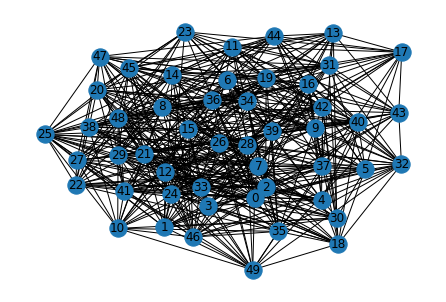

In [95]:
g = nx.watts_strogatz_graph(50, 20, 1)
nx.draw(g, with_labels=True)
calculate_density(g) # nx.density 사용하지 말 것

## 문제 7-3: Euler graph
다음 주어진 그래프가 Euler graph 인지를 확인하는 코드를 작성하시오

In [96]:
def is_Eulerian(g):
  '''
  :param g: undirected graph
  :return: Boolean
  '''
  g_nodes=g.number_of_nodes()
  for i in range(g_nodes):
   number=g.degree(i) 
   if number%2!=0:
     return False

  return True

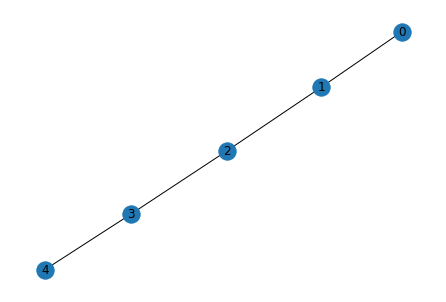

In [97]:
g = nx.path_graph(5)
nx.draw(g, with_labels=True)

In [98]:
is_Eulerian(g) # nx.is_Eulerian 사용하지 말 것

False

# 문제 8: 그래프 알고리즘 사용하기

그래프 알고리즘이 주로 사용되는 예는 항공운항정보의 네트워크를 구성할때 사용한다. 그래프 모델에서, 항공사(airlines)혹은 공항(airports)는 노드(Nodes/Vertices)로 구성되고 각 공항간의 운항 정보는 관계(Relationships/Edges)로 표현된다.

## 항공운항정보 데이터 셋업

In [99]:
import pandas as pd

In [100]:
# 공항 정보, 항공사, 운항정보를 불러오기를 수행한다
airports = pd.read_csv("airports.csv", header=None)

In [101]:
usa_airports = airports[airports.iloc[:, 3] == 'United States'] # 미국 내 공항만 추출

In [102]:
usa_airports = usa_airports.loc[:,[1,4,6,7]]
usa_airports.rename(columns={1: 'name', 4: 'id', 6: 'latitude', 7: 'longitude'}, inplace=True)
usa_airports
# column_names=['name','id','latitude','longitude']

,name,id,latitude,longitude
3200,Barter Island LRRS Airport,BTI,70.134003,-143.582001
3201,Cape Lisburne LRRS Airport,LUR,68.875099,-166.110001
3202,Point Lay LRRS Airport,PIZ,69.732903,-163.005005
3203,Hilo International Airport,ITO,19.721399,-155.048004
3204,Orlando Executive Airport,ORL,28.545500,-81.332901
...,...,...,...,...
6996,Cape Canaveral AFS Skid Strip,XMR,28.467600,-80.566597
6997,Homey (Area 51) Airport,\N,37.235001,-115.810997
6998,Zanesville Municipal Airport,ZZV,39.944401,-81.892097
7048,Nenana Municipal Airport,ENN,64.547302,-149.074005


In [103]:
trips = pd.read_csv("188591317_T_ONTIME.csv.gz", low_memory=False)

In [104]:
trips.rename(columns={"ORIGIN":"src", "DEST":"dst", "DEP_DELAY":"deptDelay", "ARR_DELAY":"arrDelay","TAIL_NUM":"tailNumber","FL_NUM":"flightNumber","FL_DATE":"date", "CRS_DEP_TIME":"time","CRS_ARR_TIME":"arrivalTime","DISTANCE":"distance","UNIQUE_CARRIER":"airline"}, inplace=True)

In [105]:
G = nx.from_pandas_edgelist(trips, source="src", target="dst", edge_attr=['distance'], create_using=nx.DiGraph())

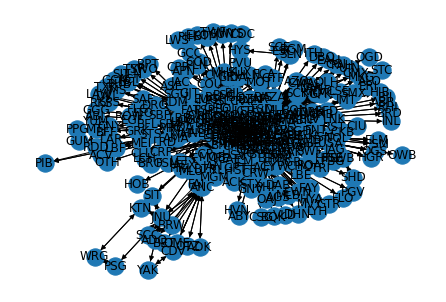

In [106]:
nx.draw(G, with_labels=True, arrows=True)

In [107]:
trips

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,date,airline,AIRLINE_ID,CARRIER,tailNumber,flightNumber,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,src,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,dst,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,time,DEP_TIME,deptDelay,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,2018,2,5,1,2,2018-05-01,DL,19790,DL,N6709,15,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1920,1919.0,-1.0,0.0,0.0,-1.0,1900-1959,15.0,1934.0,2113.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,2,5,1,2,2018-05-01,DL,19790,DL,N820DN,16,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1400,1407.0,7.0,7.0,0.0,0.0,1400-1459,21.0,1428.0,2052.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,2,5,1,2,2018-05-01,DL,19790,DL,N856DN,17,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1757,1753.0,-4.0,0.0,0.0,-1.0,1700-1759,19.0,1812.0,1932.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,2,5,1,2,2018-05-01,DL,19790,DL,N329NB,22,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1335,1329.0,-6.0,0.0,0.0,-1.0,1300-1359,14.0,1343.0,1554.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,2,5,1,2,2018-05-01,DL,19790,DL,N697DL,23,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1556,1602.0,6.0,6.0,0.0,0.0,1500-1559,21.0,1623.0,1647.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616524,2018,2,5,17,4,2018-05-17,UA,19977,UA,N76502,1434,13198,1319801,33198,MCI,"Kansas City, MO",MO,29,Missouri,64,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,625,617.0,-8.0,0.0,0.0,-1.0,0600-0659,11.0,628.0,758.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616525,2018,2,5,17,4,2018-05-17,UA,19977,UA,N73860,1431,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,12173,1217305,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,1407,1409.0,2.0,2.0,0.

미국 공항 개수, 항로의 수

In [ ]:
G.number_of_nodes()

341

In [108]:
G.number_of_edges()

5339

## 최단거리 알고리즘
최단거리 알고리즘은 다양한 방법들이 존재한다. 학습한 Dijkstra 이외에도, A*, Bellman-Ford, Floyd-Warshall, Yen's 등 다양한 알고리즘이 존재한다.
https://networkx.org/documentation/stable//reference/algorithms/shortest_paths.html#
참고하여 다음 문제를 해결하시오

## 문제 8-1: 최단거리 문제
샌프란시스코 국제 공항(San Francisco International Airport)과 뉴욕의 존 F 케네디 국제 공항(John F Kennedy International Airport)사이에 직항(non-stop flight)이 있는지 찾으시오.
힌트: 공항 코드를 사용하여, 두 공항 사이에 최단거리 경로 내 경유 공항이 있는지를 확인

출력의 결과는 참고용입니다.

In [109]:
# 샌프란시스코 국제 공항을 찾는 예제
src = usa_airports[usa_airports.name.str.contains('San Francisco International Airport')]
# 존 F 케네디 국제 공황을 찾는 예제
dst = usa_airports[usa_airports.name.str.contains('John F Kennedy International Airport')]


# 공항코드 검색
src_code=str(src['id'])
src_code=src_code[8:11]
print("샌프란시스코 공항코드",src_code)

dst_code=str(dst['id'])
dst_code=dst_code[8:11]
print("존 F 케네디 공항코드",dst_code)


샌프란시스코 공항코드 SFO
존 F 케네디 공항코드 JFK


In [110]:
def has_nonstop_flight(graph, src, dst):
  '''
  두 공항 사이에 non-stop flight가 있는지 체크하는 함수
  :param graph: trips 그래프
  :param src: 출발 공항
  :param dst: 목적 공항
  :return: Boolean
  '''
  src_code=str(src['id'])
  src_code=src_code[8:11]
  dst_code=str(dst['id'])
  dst_code=dst_code[8:11]

  ##최단경로 길이가 SFO,JFK 두개이면 직항이 있다.
  if(len(nx.shortest_path(graph,src_code,dst_code)))==2: 
     return True

  return  False

In [111]:
has_nonstop_flight(G, src, dst)

True

## 문제 8-2: 주어진 공항들을 순서대로 경유하는 경로의 최단 거리(distance)를 계산하는 함수를 작성하시오

다음 4개의 공항을 순서대로 경유하면 된다.(출발 시간은 고려하지 않는다)
Los Angeles International Airport -> Hartsfield Jackson Atlanta International Airport -> Miami International Airport -> Washington Dulles International Airport


In [112]:
# str_code=trips['distance']
# str_code

In [113]:
def shortest_path_length_from_airports(graph, airport_seq):
  '''
  주어진 공항의 시퀀스(sequence)로부터 최단경로의 거리를 계산하시오
  :param graph: trips 그래프
  :param airport_seq: 공항정보 (list형)
  :return: 총 거리(distance) 값(float형)

  '''
  distance=0
  #국제 공항을 찾는 예제
  number1 = usa_airports[usa_airports.name.str.contains('Los Angeles International Airport')]
  number2 = usa_airports[usa_airports.name.str.contains('Hartsfield Jackson Atlanta International Airport')]
  number3 = usa_airports[usa_airports.name.str.contains('Miami International Airport')]
  number4 = usa_airports[usa_airports.name.str.contains('Washington Dulles International Airport')]

  #공항코드
  number1_code=str(number1['id'])
  number1_code=number1_code[8:11]
  airport_seq.append(number1_code)

  number2_code=str(number2['id'])
  number2_code=number2_code[8:11]
  airport_seq.append(number2_code)
  
  number3_code=str(number3['id'])
  number3_code=number3_code[8:11]
  airport_seq.append(number3_code)
  
  number4_code=str(number4['id'])
  number4_code=number4_code[8:11]
  airport_seq.append(number4_code)
  
  #거리 더하기
  km=graph.get_edge_data(airport_seq[0],airport_seq[1])
  for i in km.values():
    distance+=i

  km=graph.get_edge_data(airport_seq[1],airport_seq[2])
  for i in km.values():
    distance+=i
  
  km=graph.get_edge_data(airport_seq[2],airport_seq[3])
  for i in km.values():
    distance+=i

  return distance

In [114]:
seq = [ ]
shortest_path_length_from_airports(G, seq)

3462.0

## 문제 8-3: 단일 출발지 최단거리 찾기 (Single source shortest path)
Los Angeles International Airport 국제 공항에서 직항(Non-stop)으로 이동할수 있는 공항 중에서 가장 가까운 공항과 가장 먼 공항을 반환하는 함수를 작성하시오

In [115]:
def get_farthest_or_shortest_airports_from(graph, src):
  '''
  가장 멀거나
  :param graph: trips 그래프
  :param src: 출발지
  :return: ( farthest airport code, shortest airport code ) (tuple 형으로 반환)
  '''
  code=src.loc[3272,'id']
  # stop_node=list(graph.successors(code))
  nodes=list(graph.nodes())
  no_stop_code=list()

  #직항으로 이동할 수 있는 공항 검색
  for i in range(len(nodes)):
    if len(nx.astar_path(graph,code,nodes[i]))==2:
     no_stop_code.append(nodes[i])  

  global farthest_airport_code
  global shortest_airport_code 
  #초기값 설정
  fast=-1000000000000
  short=1000000000000

  for i in range(len(no_stop_code)):
      vales=0
      #거리계산 
      distance=graph.get_edge_data(code,no_stop_code[i])
      for j in distance.values():
        vales+=j
      
      #거리비교.
      if vales>fast :
        fast=vales
        farthest_airport_code=no_stop_code[i]
      if vales<short :
        short=vales
        shortest_airport_code=no_stop_code[i]
     
  answer = (farthest_airport_code,shortest_airport_code)
  return   answer

In [116]:
##  로스앤젤레스 국제 공항을 찾는 예제
src = usa_airports[usa_airports.name.str.contains('Los Angeles International Airport')] 

get_farthest_or_shortest_airports_from(G, src)

('LIH', 'SBA')

## 문제 8-4: 출발을 제일 많이 하는 공항은?
주어진 trips 그래프로부터 제일 많은 수의 출발지(src)를 가진 공항이 어디인지 탐색하시오.

In [117]:
def get_airport_with_highest_out_degree(graph):
  '''
  graph로부터 가장 높은 out-degree를 가진 공항을 찾아서 반환
  :param graph: trips 그래프
  :return: ( airport code )
  '''
  #공항개수  
  digree_number=0
  global airport_code
  airport_list=list(G.nodes)
  
  count=0
  #out-degree 비교
  for i in airport_list:
    if(graph.out_degree(i)>digree_number):
      digree_number=graph.out_degree(i)
      airport_code=airport_list[count]
    count=count+1
  
  return   airport_code

In [118]:
get_airport_with_highest_out_degree(G)

'ATL'

## Floyd Washall 알고리즘 활용
Floyd Washall 알고리즘은 모든 쌍의 경로의 가중치를 계산하는 데 사용된다. 다음 예제를 사용하여 우리는 LAX 코드를 가진 공항에서 출발하는 모든 공항에 대한 최단경로의 거리값을 계산할 수 있다.
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.dense.floyd_warshall.html#networkx.algorithms.shortest_paths.dense.floyd_warshall

In [119]:
all_pairs_shortest_path = nx.floyd_warshall(G, weight='distance')

In [120]:
# 예시 floyd_warshall
for k, dists in all_pairs_shortest_path.items():
  if k == 'LAX':
    print(dists)

defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f4f89fe7320>, {'LAX': 0, 'ATL': 1946.0, 'SEA': 954.0, 'JFK': 2475.0, 'BNA': 1797.0, 'MSY': 1670.0, 'HNL': 2556.0, 'DFW': 1235.0, 'TPA': 2158.0, 'MCI': 1363.0, 'AUS': 1242.0, 'DEN': 862.0, 'IND': 1814.0, 'SLC': 590.0, 'PDX': 834.0, 'CVG': 1900.0, 'MCO': 2218.0, 'DTW': 1978.0, 'RDU': 2239.0, 'OGG': 2486.0, 'LAS': 236.0, 'KOA': 2504.0, 'MSP': 1535.0, 'DCA': 2311.0, 'LIH': 2615.0, 'SAN': 109.0, 'BOS': 2610.0, 'SFO': 337.0, 'MEM': 1619.0, 'CMH': 1995.0, 'MIA': 2342.0, 'SJC': 308.0, 'MFR': 630.0, 'BLI': 1047.0, 'SGF': 1423.0, 'TUL': 1283.0, 'EUG': 748.0, 'BOI': 674.0, 'PVU': 569.0, 'MSO': 923.0, 'EWR': 2454.0, 'IAD': 2288.0, 'ORD': 1744.0, 'IAH': 1379.0, 'CLE': 2052.0, 'BWI': 2329.0, 'ITO': 2449.0, 'SDF': 1843.0, 'ANC': 2345.0, 'PHL': 2401.0, 'FLL': 2342.0, 'DAL': 1246.0, 'ABQ': 677.0, 'ELP': 715.0, 'HOU': 1390.0, 'MDW': 1750.0, 'MKE': 1756.0, 'OAK': 337.0, 'PHX': 370.0, 'PIT': 2136.0, 'RN

## 문제 8-5: 2시간 내 도착지 계산 (Floyd Washall 알고리즘의 활용)
비행기의 속도가 500 km/h 라고 가정할 때 2시간내로 도착하는 공항 코드를 반환하는 함수를 작성하시오

In [121]:
def get_airports_within_2hours(G,speed,src='LAX'):
  '''
  2시간내
  :param G: trips 그래프
  :param speed: 비행기의 속도  km/h
  :return: 공항 코드 (list 형)
  '''
  # 
  global LAX_src
  ##LAX 코드를 가진 공항에서 출발하는 모든 공항에 대한 최단경로의 거리값을 딕셔너리
  all_pairs_shortest_path = nx.floyd_warshall(G, weight='distance')
  for k,dists in all_pairs_shortest_path.items():
    if k==src:
      LAX_src=dists

  word=[]
  number=[]
  ##공항번호 저장
  for j in LAX_src.keys():
    word.append(j)   
  #거리값 저장
  for j in LAX_src.values():
    number.append(j)
 
  #자기자신 삭제
  word.remove('LAX') 
  number.remove(0)
 
  word2=[]
  number2=[]
  #2시간에 1000km/h 미만인 공항번호 추출
  for i in range(len(number)):
    if(speed*2>number[i]):
      word2.append(word[i])
      number2.append(number[i])

  return print(word2)

In [122]:
flight_speed = 500 # km/h
get_airports_within_2hours(G, flight_speed)

['SEA', 'DEN', 'SLC', 'PDX', 'LAS', 'SAN', 'SFO', 'SJC', 'MFR', 'EUG', 'BOI', 'PVU', 'MSO', 'ABQ', 'ELP', 'OAK', 'PHX', 'RNO', 'SMF', 'TUS', 'FAT', 'RDM', 'SGU', 'SBA', 'MRY', 'PSP', 'SBP', 'COS', 'FLG', 'GEG', 'BIL', 'SNA', 'JAC', 'BZN', 'AZA', 'SCK', 'SMX', 'PSC', 'IDA', 'GJT', 'ONT', 'BUR', 'EGE', 'AMA', 'LBB', 'MAF', 'LGB', 'SAF', 'ROW', 'DRO', 'BFL', 'STS', 'ASE', 'YUM', 'TWF', 'PIH', 'CPR', 'HLN', 'SUN', 'PUB', 'LAR', 'RDD', 'ACV', 'OTH', 'COD', 'BTM', 'CDC', 'EKO', 'WYS']


완료한 숙제는 ipynb 파일형식으로 다운로드 받아서, 가상대학 내 [과제 7,8에 업로드하시기 바랍니다.

# 감사합니다.